## Import Required Libraries

This section imports all the necessary libraries for building models for image classification using PyTorch and related tools.

In [1]:
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
from torchinfo import summary

## Image Transformation Details

The image transformation pipeline, stored in the variable `trans`, is defined using `torchvision.transforms.Compose`. It consists of the following steps:

1. **Resize**: The input image is resized to 256x256 pixels using bilinear interpolation.
2. **ToTensor**: The resized image is converted to a PyTorch tensor, scaling pixel values to the range [0, 1].

This transformation ensures that all images fed into the model have a consistent size and format suitable for processing by PyTorch neural networks.

In [2]:
trans = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

Open the image in grayscale mode to ensure it has a single channel, which is suitable for 1-channel (grayscale) image classification tasks.

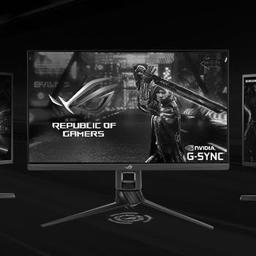

In [3]:
img = Image.open("/Users/arponbiswas/Computer-Vision-Projects/Image_classification_projects/PC_Parts_Image_Classification/Data/pc_parts_ready/monitor/1.jpg").convert('L')
img

In [4]:
trans(img).shape    # checking the shape of the image tensor

torch.Size([1, 256, 256])

## SimpleCNN Model Architecture

The `SimpleCNN` class defines a straightforward convolutional neural network for grayscale image classification. Below are the key architectural details:

- **Version:** 1.0
- **Input:** Grayscale images of size 256x256 (1 channel)
- **Layers:**
    - **Convolutional Layer:**  
        - `nn.Conv2d` with 1 input channel, 1 output channel, kernel size 6x6, stride 4, no padding  
        - Followed by `nn.ReLU` activation
        - Followed by `nn.MaxPool2d` with kernel size 3x3, stride 3
    - **Flatten Layer:**  
        - Flattens the output from the convolutional block to a 1D tensor
    - **Fully Connected Layer:**  
        - `nn.Linear` with 441 input features (1 × 21 × 21) and 14 output classes

### Forward Pass

1. The input image passes through the convolutional block (`layer1`).
2. The output is flattened into a vector.
3. The flattened vector is passed through a fully connected layer (`fc1`) to produce class logits.

### Usage

This model is suitable for simple grayscale image classification tasks with 14 output classes. The architecture is intentionally minimal for educational or prototyping purposes.

In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.version = '1.0'
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=1, kernel_size=6, stride=4, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3),
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1 * 21 * 21, 14)

    def forward(self, x):
        out = self.layer1(x)
        out = self.flatten(out)
        out = self.fc1(out)
        return out

In [6]:
model = SimpleCNN()

In [7]:
model   # Showing the model structure in rough format

SimpleCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 1, kernel_size=(6, 6), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=441, out_features=14, bias=True)
)

## Detailed Model Information

The following cell provides a comprehensive summary of the `SimpleCNN` model architecture using the `torchinfo.summary` function. This summary includes details such as kernel sizes, input and output shapes for each layer, the number of parameters, and computational complexity. Such analysis is essential for understanding the structure and resource requirements of the model before training or deployment.

In [8]:
summary(
    model, 
    input_size=(1, 1, 256, 256), 
    col_names=[
        "kernel_size", "input_size", "output_size", 
        "num_params", "mult_adds", "trainable"
    ], 
    row_settings=["var_names", "depth"],
)

Layer (type (var_name):depth-idx)        Kernel Shape              Input Shape               Output Shape              Param #                   Mult-Adds                 Trainable
SimpleCNN (SimpleCNN)                    --                        [1, 1, 256, 256]          [1, 14]                   --                        --                        True
├─Sequential (layer1): 1-1               --                        [1, 1, 256, 256]          [1, 1, 21, 21]            --                        --                        True
│    └─Conv2d (0): 2-1                   [6, 6]                    [1, 1, 256, 256]          [1, 1, 63, 63]            37                        146,853                   True
│    └─ReLU (1): 2-2                     --                        [1, 1, 63, 63]            [1, 1, 63, 63]            --                        --                        --
│    └─MaxPool2d (2): 2-3                3                         [1, 1, 63, 63]            [1, 1, 21, 21]          